# <center>Stock Market Prediction using Daily News</center>
## <center>CS 6120: Final Project</center>
## <center> Sidd Pant, Thai Huynh, Thinh Lam</center>

### Data Extraction and Preprocessing

In [107]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import re 
import nltk
nltk.download('stopwords')  
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#!pip install lime
import lime
from __future__ import print_function

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

import tensorflow as tf
from tensorflow import keras

#!pip install keras-tuner
import kerastuner
from kerastuner import RandomSearch
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thaihuynh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thaihuynh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thaihuynh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['Combined_News_DJIA.csv']))
df = pd.read_csv('Combined_News_DJIA.csv')

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
print("rows: {}, columns: {}".format(df.shape[0], df.shape[1]))

rows: 1989, columns: 27


In [6]:
df.drop(columns=['Date'], inplace = True)

In [7]:
Y = df['Label']

In [8]:
X_preprocessed = df.drop(['Label'],axis = 1)

In [9]:
lem = WordNetLemmatizer()
def processText(inputText):
    processedText = re.sub('b\'', '', inputText)
    processedText = re.sub('b\"', '', processedText)
    processedText = re.sub('[^a-zA-Z0-9]', ' ', processedText)
    processedText = processedText.lower()
    processedText = processedText.split()
    processedText = [lem.lemmatize(word) for word in processedText if word not in set(stopwords.words('english'))]
    processedText = " ".join(processedText)
    return processedText

In [10]:
X_preprocessed = X_preprocessed.astype(str)

In [11]:
X_processed = X_preprocessed.applymap(processText)

In [12]:
X_processed.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity u n official say s...,150 russian tank entered south ossetia whilst ...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,georgian troop retreat osettain capital presum...,u prep georgia war russia,...,georgia invades south ossetia russia get invol...,al qaeda face islamist backlash,condoleezza rice u would act prevent israeli s...,busy day european union approved new sanction ...,georgia withdraw 1 000 soldier iraq help fight...,pentagon think attacking iran bad idea u news ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitor suffering mental illness banned olympics,help mexico kidnapping surge
1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living ossetia blame u georgi...,welcome world war iv high definition,georgia move mistake monumental proportion,...,israel u behind georgian aggression,believe tv neither russian georgian much victim,riot still going montreal canada police murder...,china overtake u largest manufacturer,war south ossetia pic,israeli physician group condemns state torture,russia beaten united state head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food
2,remember adorable 9 year old sang opening cere...,russia end georgia operation,sexual harassment would child,al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,u military surprised timing swiftness russian ...,u beat war drum iran dump dollar,...,u troop still georgia know georgia first place,russia response georgia right,gorbachev accuses u making serious blunder pur...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia israeli connection,sign point u encouraging georgia invade south ...,christopher king argues u nato behind georgian...,america new mexico,bbc news asia pacific extinction man climate
3,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,commander navy air reconnaissance squadron pro...,92 cnn reader russia action georgia justified,...,elephant extinct 2020,u humanitarian mission soon georgia russia hit...,georgia ddos came u source,russian convoy head georgia violating truce,israeli defence minister u strike iran,gorbachev choice,witness russian force head towards tbilisi bre...,quarter russian blame u conflict poll,georgian president say u military take control...,2006 nobel laureate aleksander solzhenitsyn ac...
4,expert admit legalise drug,war south osetia 89 picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,russia exaggerating south ossetian death toll ...,musharraf expected resign rather face impeachment,...,bank 

In [13]:
# combining the corpus
X_combined = pd.Series(X_processed.fillna('').values.tolist()).map(lambda x: ' '.join(map(str,x))).to_frame()
X_combined.columns = ['RawCorpus']

In [14]:
X_combined.head()

,RawCorpus
0,georgia down two russian warplane country move...
1,wont america nato help u wont help u help iraq...
2,remember adorable 9 year old sang opening cere...
3,u refuse israel weapon attack iran report pres...
4,expert admit legalise drug war south osetia 89...


In [15]:
data_processed = pd.concat([X_processed, Y], axis=1)
data_processed.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Label
0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity u n official say s...,150 russian tank entered south ossetia whilst ...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,georgian troop retreat osettain capital presum...,u prep georgia war russia,...,al qaeda face islamist backlash,condoleezza rice u would act prevent israeli s...,busy day european union approved new sanction ...,georgia withdraw 1 000 soldier iraq help fight...,pentagon think attacking iran bad idea u news ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitor suffering mental illness banned olympics,help mexico kidnapping surge,0
1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living ossetia blame u georgi...,welcome world war iv high definition,georgia move mistake monumental proportion,...,believe tv neither russian georgian much victim,riot still going montreal canada police murder...,china overtake u largest manufacturer,war south ossetia pic,israeli physician group condemns state torture,russia beaten united state head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food,1
2,remember adorable 9 year old sang opening cere...,russia end georgia operation,sexual harassment would child,al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,u military surprised timing swiftness russian ...,u beat war drum iran dump dollar,...,russia response georgia right,gorbachev accuses u making serious blunder pur...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia israeli connection,sign point u encouraging georgia invade south ...,christopher king argues u nato behind georgian...,america new mexico,bbc news asia pacific extinction man climate,0
3,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,commander navy air reconnaissance squadron pro...,92 cnn reader russia action georgia justified,...,u humanitarian mission soon georgia russia hit...,georgia ddos came u source,russian convoy head georgia violating truce,israeli defence minister u strike iran,gorbachev choice,witness russian force head towards tbilisi bre...,quarter russian blame u conflict poll,georgian president say u military take control...,2006 nobel laureate aleksander solzhenitsyn ac...,0
4,expert admit legalise drug,war south osetia 89 picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,russia exaggerating south ossetian death toll ...,musharraf expected resign rather face impeachment,...,georgia confict could set back russia u relati...,war caucasus much product american imperial dr...,non medium photo south ossetia georgia conflict,geor

In [16]:
data_combined = pd.concat([X_combined, Y], axis=1)
data_combined.head()

,RawCorpus,Label
0,georgia down two russian warplane country move...,0
1,wont america nato help u wont help u help iraq...,1
2,remember adorable 9 year old sang opening cere...,0
3,u refuse israel weapon attack iran report pres...,0
4,expert admit legalise drug war south osetia 89...,1


In [17]:
data_combined['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

## Supervised Machine Learning

In [18]:
X_train, X_test, y_train,y_test = train_test_split(data_combined.iloc[:,0], data_combined.iloc[:,1], test_size=0.2, random_state=32)

In [106]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1591,) (1591,)
(398,) (398,)


In [107]:
vectorizer_unigram = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range= (1,1),lowercase=False)
train_vectors_unigram = vectorizer_unigram.fit_transform(X_train)
test_vectors_unigram = vectorizer_unigram.transform(X_test)

vectorizer_bigram = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range= (2,2),lowercase=False)
train_vectors_bigram = vectorizer_bigram.fit_transform(X_train)
test_vectors_bigram = vectorizer_bigram.transform(X_test)

vectorizer_trigram = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range= (3,3),lowercase=False)
train_vectors_trigram = vectorizer_trigram.fit_transform(X_train)
test_vectors_trigram = vectorizer_trigram.transform(X_test)

vectorizer_fourgram = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range= (4,4),lowercase=False)
train_vectors_fourgram = vectorizer_fourgram.fit_transform(X_train)
test_vectors_fourgram = vectorizer_fourgram.transform(X_test)

vectorizer_fivegram = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range= (5,5),lowercase=False)
train_vectors_fivegram = vectorizer_fivegram.fit_transform(X_train)
test_vectors_fivegram = vectorizer_fivegram.transform(X_test)

In [108]:
pipe = Pipeline(steps=[('estimator', LogisticRegression())])

In [109]:
params_grid = [{
                'estimator':[LogisticRegression(max_iter = 1000000)],
                'estimator__C': [1, 10, 100, 1000,10000],
                },
                {
                'estimator': [SVC(kernel = 'linear',probability=True)],
                'estimator__C': [1, 10, 100, 1000,10000],
                },
               {
                'estimator':[MultinomialNB()],
                'estimator__alpha': np.linspace(0.25,0.75,51),  
               },
               {
                'estimator':[BernoulliNB()],
                'estimator__alpha': np.linspace(0.05,0.25,21),  
               },
              ]


In [110]:
grid_unigram = GridSearchCV(pipe, params_grid,scoring = 'accuracy',cv = 5, verbose = 1)
grid_bigram = GridSearchCV(pipe, params_grid,scoring = 'accuracy',cv = 5, verbose = 1)
grid_trigram = GridSearchCV(pipe, params_grid,scoring = 'accuracy',cv = 5, verbose = 1)
grid_fourgram = GridSearchCV(pipe, params_grid,scoring = 'accuracy',cv = 5, verbose = 1)
grid_fivegram = GridSearchCV(pipe, params_grid,scoring = 'accuracy',cv = 5, verbose = 1)

In [111]:
grid_unigram.fit(train_vectors_unigram, y_train)

Fitting 5 folds for each of 82 candidates, totalling 410 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [LogisticRegression(max_iter=1000000)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [SVC(kernel='linear', probability=True)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [MultinomialNB(alpha=0.72)],
                          'estimator__alpha': array([0.25, 0.26...
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
       0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,
       0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75])},
                         {'estimator': [BernoulliNB()],
                          'estimator__alpha': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.1

In [112]:
grid_bigram.fit(train_vectors_bigram, y_train)

Fitting 5 folds for each of 82 candidates, totalling 410 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [LogisticRegression(C=1,
                                                           max_iter=1000000)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [SVC(kernel='linear', probability=True)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [MultinomialNB(alpha=0.72)],
                          'estimator__alpha': array([0.25,...
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
       0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,
       0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75])},
                         {'estimator': [BernoulliNB()],
                          'estimator__alpha': array([0.05, 0.06, 0.07, 0.08, 0.09,

In [113]:
grid_trigram.fit(train_vectors_trigram, y_train)

Fitting 5 folds for each of 82 candidates, totalling 410 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [LogisticRegression(C=1,
                                                           max_iter=1000000)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [SVC(kernel='linear', probability=True)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [MultinomialNB(alpha=0.74)],
                          'estimator__alpha': array([0.25,...
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
       0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,
       0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75])},
                         {'estimator': [BernoulliNB()],
                          'estimator__alpha': array([0.05, 0.06, 0.07, 0.08, 0.09,

In [114]:
grid_fourgram.fit(train_vectors_fourgram, y_train)

Fitting 5 folds for each of 82 candidates, totalling 410 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [LogisticRegression(C=1,
                                                           max_iter=1000000)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [SVC(C=10, kernel='linear',
                                            probability=True)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [MultinomialNB(alpha=0.74)],
                          'estimator__alpha': array([...
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
       0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,
       0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75])},
                         {'estimator': [BernoulliNB()],
                          'estimator_

In [115]:
grid_fivegram.fit(train_vectors_fivegram, y_train)

Fitting 5 folds for each of 82 candidates, totalling 410 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [LogisticRegression(C=1,
                                                           max_iter=1000000)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [SVC(C=10, kernel='linear',
                                            probability=True)],
                          'estimator__C': [1, 10, 100, 1000, 10000]},
                         {'estimator': [MultinomialNB(alpha=0.42000000000000004)],
                          'estimator_...
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
       0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,
       0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68,
       0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75])},
                         {'estimator': [BernoulliNB()],
                          'estimator__

In [116]:
grid_unigram.best_params_

{'estimator': MultinomialNB(alpha=0.42000000000000004),
 'estimator__alpha': 0.72}

In [117]:
grid_bigram.best_params_

{'estimator': LogisticRegression(C=1, max_iter=1000000), 'estimator__C': 1}

In [118]:
grid_trigram.best_params_

{'estimator': MultinomialNB(alpha=0.42000000000000004),
 'estimator__alpha': 0.74}

In [119]:
grid_fourgram.best_params_

{'estimator': SVC(C=10, kernel='linear', probability=True), 'estimator__C': 10}

In [120]:
grid_fivegram.best_params_

{'estimator': MultinomialNB(alpha=0.42000000000000004),
 'estimator__alpha': 0.42000000000000004}

In [135]:
pred_unigram = grid_unigram.predict(test_vectors_unigram)
print("f1",sklearn.metrics.f1_score(y_test, pred_unigram, average='binary'))
print("precision",sklearn.metrics.precision_score(y_test, pred_unigram, average='binary'))
print("recall",sklearn.metrics.recall_score(y_test, pred_unigram, average='binary'))
print("accuracy", sklearn.metrics.accuracy_score(y_test, pred_unigram))
print(metrics.confusion_matrix(y_test,pred_unigram))

f1 0.705691056910569
precision 0.5465994962216625
recall 0.9954128440366973
accuracy 0.5452261306532663
[[  0 180]
 [  1 217]]


In [136]:
pred_bigram = grid_bigram.predict(test_vectors_bigram)
print("f1",sklearn.metrics.f1_score(y_test, pred_bigram, average='binary'))
print("precision",sklearn.metrics.precision_score(y_test, pred_bigram, average='binary'))
print("recall",sklearn.metrics.recall_score(y_test, pred_bigram, average='binary'))
print("accuracy", sklearn.metrics.accuracy_score(y_test, pred_bigram))
print(metrics.confusion_matrix(y_test,pred_bigram))

f1 0.7091503267973857
precision 0.550761421319797
recall 0.9954128440366973
accuracy 0.5527638190954773
[[  3 177]
 [  1 217]]


In [137]:
pred_trigram = grid_trigram.predict(test_vectors_trigram)
print("f1",sklearn.metrics.f1_score(y_test, pred_trigram, average='binary'))
print("precision",sklearn.metrics.precision_score(y_test, pred_trigram, average='binary'))
print("recall",sklearn.metrics.recall_score(y_test, pred_trigram, average='binary'))
print("accuracy", sklearn.metrics.accuracy_score(y_test, pred_trigram))
print(metrics.confusion_matrix(y_test,pred_trigram))

f1 0.6977547495682211
precision 0.5595567867036011
recall 0.926605504587156
accuracy 0.5603015075376885
[[ 21 159]
 [ 16 202]]


In [138]:
pred_fourgram = grid_fourgram.predict(test_vectors_fourgram)
print("f1",sklearn.metrics.f1_score(y_test, pred_fourgram, average='binary'))
print("precision",sklearn.metrics.precision_score(y_test, pred_fourgram, average='binary'))
print("recall",sklearn.metrics.recall_score(y_test, pred_fourgram, average='binary'))
print("accuracy", sklearn.metrics.accuracy_score(y_test, pred_fourgram))
print(metrics.confusion_matrix(y_test,pred_fourgram))

f1 0.6691588785046728
precision 0.5646687697160884
recall 0.8211009174311926
accuracy 0.5552763819095478
[[ 42 138]
 [ 39 179]]


In [139]:
pred_fivegram = grid_fivegram.predict(test_vectors_fivegram)
print("f1",sklearn.metrics.f1_score(y_test, pred_fivegram, average='binary'))
print("precision",sklearn.metrics.precision_score(y_test, pred_fivegram, average='binary'))
print("recall",sklearn.metrics.recall_score(y_test, pred_fivegram, average='binary'))
print("accuracy", sklearn.metrics.accuracy_score(y_test, pred_fivegram))
print(metrics.confusion_matrix(y_test,pred_fivegram))

f1 0.6795096322241682
precision 0.5495750708215298
recall 0.8899082568807339
accuracy 0.5402010050251256
[[ 21 159]
 [ 24 194]]


In [126]:
c3 = make_pipeline(vectorizer_trigram, grid_trigram)
c4 = make_pipeline(vectorizer_fourgram, grid_fourgram)
c5 = make_pipeline(vectorizer_fivegram, grid_fivegram)

In [127]:
class_names = [0,1]

In [128]:
print(c3.predict_proba([X_test.iloc[4]]))
print(c4.predict_proba([X_test.iloc[4]]))
print(c5.predict_proba([X_test.iloc[4]]))

[[0.45298028 0.54701972]]
[[0.44097146 0.55902854]]
[[0.50174409 0.49825591]]


## LIME Explainer

In [129]:
 from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [130]:
idx = 83
exp3 = explainer.explain_instance(X_test.iloc[idx], c3.predict_proba, num_features=10)
print('Date: %d' % idx)
print('Probability(UP) =', c3.predict_proba([X_test.iloc[idx]])[0,1])
print('True class: %s' % class_names[y_test.iloc[idx]])

Date: 83
Probability(UP) = 0.5758607697180906
True class: 1


In [143]:
exp3.as_list()

[('david', 0.01528359614426662),
 ('minister', 0.01360911269431382),
 ('saudi', 0.009482688457030127),
 ('old', -0.008202357193572834),
 ('kim', 0.006804055592906224),
 ('prime', 0.006668956185429725),
 ('cameron', 0.006639933021776804),
 ('jong', 0.006440645345907512),
 ('arabia', 0.005532510692567405),
 ('arrested', 0.004378207864353341)]

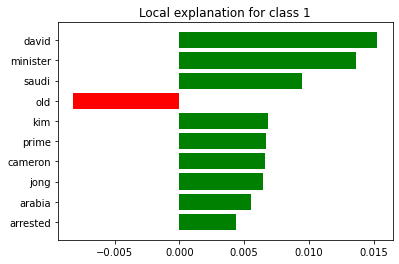

In [133]:
%matplotlib inline
fig3 = exp3.as_pyplot_figure()

In [131]:
idx = 83
exp4 = explainer.explain_instance(X_test.iloc[idx], c4.predict_proba, num_features=10)
print('Date: %d' % idx)
print('Probability(UP) =', c4.predict_proba([X_test.iloc[idx]])[0,1])
print('True class: %s' % class_names[y_test.iloc[idx]])

Date: 83
Probability(UP) = 0.39622333173666363
True class: 1


In [144]:
exp4.as_list()

[('leader', -0.02855454555129423),
 ('cameron', -0.025436219973309457),
 ('un', -0.0254345474885908),
 ('prime', -0.024861185318206712),
 ('david', -0.02445924611869413),
 ('jong', -0.02441721969370548),
 ('minister', -0.02415312476299024),
 ('kim', -0.02292466874704879),
 ('webcam', 0.0033142655033749496),
 ('circus', 0.0031824437019957992)]

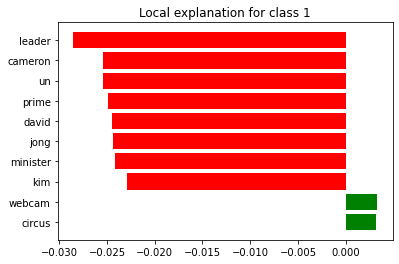

In [134]:
fig4 = exp4.as_pyplot_figure()

## Sentiment Intensity Analysis

In [147]:
def processText2(inputText):
    processedText = re.sub('[^a-zA-Z]', ' ', inputText)
    processedText = processedText.replace("b ", "")
    processedText = processedText.lower()
    processedText = processedText.split()
    processedText = " ".join(processedText)
    return processedText

In [148]:
sia = SentimentIntensityAnalyzer()

In [149]:
data_processed = data_processed.fillna("none")

In [150]:
data_processed.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Label
0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity u n official say s...,150 russian tank entered south ossetia whilst ...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,georgian troop retreat osettain capital presum...,u prep georgia war russia,...,al qaeda face islamist backlash,condoleezza rice u would act prevent israeli s...,busy day european union approved new sanction ...,georgia withdraw 1 000 soldier iraq help fight...,pentagon think attacking iran bad idea u news ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitor suffering mental illness banned olympics,help mexico kidnapping surge,0
1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living ossetia blame u georgi...,welcome world war iv high definition,georgia move mistake monumental proportion,...,believe tv neither russian georgian much victim,riot still going montreal canada police murder...,china overtake u largest manufacturer,war south ossetia pic,israeli physician group condemns state torture,russia beaten united state head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food,1
2,remember adorable 9 year old sang opening cere...,russia end georgia operation,sexual harassment would child,al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,u military surprised timing swiftness russian ...,u beat war drum iran dump dollar,...,russia response georgia right,gorbachev accuses u making serious blunder pur...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia israeli connection,sign point u encouraging georgia invade south ...,christopher king argues u nato behind georgian...,america new mexico,bbc news asia pacific extinction man climate,0
3,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,commander navy air reconnaissance squadron pro...,92 cnn reader russia action georgia justified,...,u humanitarian mission soon georgia russia hit...,georgia ddos came u source,russian convoy head georgia violating truce,israeli defence minister u strike iran,gorbachev choice,witness russian force head towards tbilisi bre...,quarter russian blame u conflict poll,georgian president say u military take control...,2006 nobel laureate aleksander solzhenitsyn ac...,0
4,expert admit legalise drug,war south osetia 89 picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,russia exaggerating south ossetian death toll ...,musharraf expected resign rather face impeachment,...,georgia confict could set back russia u relati...,war caucasus much product american imperial dr...,non medium photo south ossetia georgia conflict,geor

In [152]:
myPred = []
for j in range(data_processed.shape[0]):
    totalNeg = 0
    totalPos = 0
    for i in range(0, 25):
        temp = sia.polarity_scores(processText2(data_processed.iloc[j, i]))
        totalNeg += temp['neg']- 0.13     #0.895 was found by weight bias trials & errors
        totalPos += temp['pos']
#     print(df['Label'][j])
#     print("Neg: ", totalNeg, "Pos: ", totalPos)
    if totalPos >= totalNeg:
        myPred.append(1)
    else:
        myPred.append(0)
data_processed['SIAPredict'] = myPred

In [153]:
print("number of positive labels: {}".format(data_processed['Label'].sum()))
print("number of adjusted predicts: {}".format(data_processed["SIAPredict"].sum()))

number of positive labels: 1065
number of adjusted predicts: 1065


In [154]:
tp, fn, fp, tn = 0,0,0,0

for i in range(data_processed.shape[0]):
    if data_processed['Label'][i] == 1 and data_processed['SIAPredict'][i] == 1:
        tp += 1
    elif data_processed['Label'][i] == 1 and data_processed['SIAPredict'][i] == 0:
        fn += 1
    elif data_processed['Label'][i] == 0 and data_processed['SIAPredict'][i] == 1:
        fp += 1
    elif data_processed['Label'][i] == 0 and data_processed['SIAPredict'][i] == 0:
        tn += 1

def calculate_ppv(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

print("tp: {}, tn: {}, fp: {}, fn: {}".format(tp, tn, fp, fn))
precision, recall = calculate_ppv(tp, tn, fp, fn)
print("precision: {}, recall: {}".format(precision, recall))
f1 = 2*precision*recall/(precision+recall)
print("f1: ", f1)
print((tp+tn)/(tp+tn+fp+fn))

tp: 581, tn: 440, fp: 484, fn: 484
precision: 0.5455399061032864, recall: 0.5455399061032864
f1:  0.5455399061032864
0.5133232780291603


We computed all the essestial metrics to determine the efficiency of my analysis. 
accuracy is 0.51, precision is 0.54, recalled is 0.54 and f1 is 0.54

In [155]:
sentences = data_combined['RawCorpus'].tolist()
for i in range(len(sentences)):
    sentences[i] = sentences[i].split()

## Word2Vec embedding with CNN

In [156]:
w2v_model = Word2Vec(sentences,size= 300, window = 5, workers = 8, min_count=2)

In [157]:
FILE = 'embedding_word2vec.txt'
w2v_model.wv.save_word2vec_format(FILE, binary=False)

In [158]:
def create_embedding(file):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    records = {}
    for each in data[1:]:
        temp = each.split()
        records[temp[0]] = np.asarray(temp[1:],dtype='float32')
    return records

In [159]:
w2v_embedding = create_embedding(FILE)

In [160]:
words = w2v_model.wv.vocab
print(w2v_model.wv['getting'])

[-1.39486417e-03  4.12482262e-01  1.20008692e-01  1.39224499e-01
  1.62638322e-01  1.84157670e-01  6.40253499e-02  4.89180326e-01
 -2.07814202e-01 -2.21143290e-02  1.27498806e-01 -2.68194348e-01
 -6.64498424e-03 -2.53061295e-01  1.48576796e-01  2.85851508e-01
  5.14327228e-01  2.94186592e-01 -2.03109488e-01 -6.25509247e-02
  2.72754133e-01 -4.78284471e-02 -6.28823414e-02  1.88813787e-02
 -1.44693971e-01  4.62996624e-02 -4.72125113e-01  1.72025815e-01
  7.94492587e-02 -3.55996452e-02 -1.06584698e-01  9.32829157e-02
 -3.45761478e-01  2.82332320e-02  4.18809533e-01  4.37541515e-01
 -1.10533141e-01 -1.34665653e-01  4.79441322e-03 -1.08125381e-01
  5.33130616e-02  5.89945242e-02  1.97916389e-01 -2.61624187e-01
  7.82001466e-02  2.63302922e-01 -1.78756714e-01 -7.51332492e-02
  8.77300873e-02 -2.43757635e-01 -8.68635401e-02  1.66601747e-01
  1.14484407e-01  3.16396058e-01  2.23743811e-01 -1.64689824e-01
 -1.58734635e-01  4.14240718e-01 -4.06369209e-01 -2.03364622e-02
 -3.18479948e-02  8.12762

In [161]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [162]:
BOW = tokenizer.word_index

In [163]:
max_length = 0
for each in sentences:
    max_length = max(max_length, len(each))

In [164]:
encoded_sent = tokenizer.texts_to_sequences(sentences)
Xtrain = pad_sequences(encoded_sent, maxlen=max_length, padding='post')
# define training labels
ytrain = data_combined['Label']

In [165]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtrain,ytrain, test_size=0.2, random_state=32)

In [166]:
def get_weight_matrix(embedding, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 300))
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

In [167]:
weight_matrix = get_weight_matrix(w2v_embedding,BOW)

In [ ]:
embedding_layer = Embedding(len(BOW)+1, 300, weights=[weight_matrix], input_length=max_length, trainable=False)
 
# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1 , activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train2, y_train2, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(X_test2, y_test2, verbose=0)
print('Test Accuracy: %f' % (acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 477, 300)          9072900   
_________________________________________________________________
conv1d (Conv1D)              (None, 475, 128)          115328    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 237, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 30336)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 30337     
Total params: 9,218,565
Trainable params: 145,665
Non-trainable params: 9,072,900
_________________________________________________________________
None
Epoch 1/10


# Topic Modeling

In [70]:
data_processed_topic_modelling = data_processed
data_processed_topic_modelling.drop(['Label'],axis = 1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity u n official say s...,150 russian tank entered south ossetia whilst ...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,georgian troop retreat osettain capital presum...,u prep georgia war russia,...,georgia invades south ossetia russia get invol...,al qaeda face islamist backlash,condoleezza rice u would act prevent israeli s...,busy day european union approved new sanction ...,georgia withdraw 1 000 soldier iraq help fight...,pentagon think attacking iran bad idea u news ...,caucasus crisis georgia invades south ossetia,indian shoe manufactory series like work,visitor suffering mental illness banned olympics,help mexico kidnapping surge
1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living ossetia blame u georgi...,welcome world war iv high definition,georgia move mistake monumental proportion,...,israel u behind georgian aggression,believe tv neither russian georgian much victim,riot still going montreal canada police murder...,china overtake u largest manufacturer,war south ossetia pic,israeli physician group condemns state torture,russia beaten united state head peak oil,perhaps question georgia russia conflict,russia much better war,come trading sex food
2,remember adorable 9 year old sang opening cere...,russia end georgia operation,sexual harassment would child,al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo 100 laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,u military surprised timing swiftness russian ...,u beat war drum iran dump dollar,...,u troop still georgia know georgia first place,russia response georgia right,gorbachev accuses u making serious blunder pur...,russia georgia nato cold war two,remember adorable 62 year old led country war ...,war georgia israeli connection,sign point u encouraging georgia invade south ...,christopher king argues u nato behind georgian...,america new mexico,bbc news asia pacific extinction man climate
3,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body 14 year old found trunk latest ransom pai...,china moved 10 million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,commander navy air reconnaissance squadron pro...,92 cnn reader russia action georgia justified,...,elephant extinct 2020,u humanitarian mission soon georgia russia hit...,georgia ddos came u source,russian convoy head georgia violating truce,israeli defence minister u strike iran,gorbachev choice,witness russian force head towards tbilisi bre...,quarter russian blame u conflict poll,georgian president say u military take control...,2006 nobel laureate aleksander solzhenitsyn ac...
4,expert admit legalise drug,war south osetia 89 picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia 44...,missile killed 9 inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,russia exaggerating south ossetian death toll ...,musharraf expected resign rather face impeachment,...,bank 

In [71]:
headlines = {}
list_of_headlines = []
for i in range(len(data_processed_topic_modelling)):
  for j in range(25):
      list_of_headlines.append(data_processed_topic_modelling.values[i][j])

headlines['Headlines'] = list_of_headlines

In [72]:
data_headlines = pd.DataFrame(data = headlines)

In [73]:
data_headlines

,Headlines
0,georgia down two russian warplane country move...
1,breaking musharraf impeached
2,russia today column troop roll south ossetia f...
3,russian tank moving towards capital south osse...
4,afghan child raped impunity u n official say s...
...,...
49720,philippine president rodrigo duterte urge peop...
49721,spain arrest three pakistani accused promoting...
49722,venezuela anger food shortage still mounting c...
49723,hindu temple worker killed three men motorcycl...


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tfidf = TfidfVectorizer(max_df = 0.75,min_df = 5, stop_words = 'english',max_features = 30000)

In [76]:
tfidf_matrix = tfidf.fit_transform(data_headlines['Headlines'])

In [77]:
tfidf_matrix

<49725x9948 sparse matrix of type '<class 'numpy.float64'>'
	with 502414 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.decomposition import LatentDirichletAllocation

In [79]:
lda_model = LatentDirichletAllocation(n_components = 100,doc_topic_prior = 0.0025, topic_word_prior = 0.0025, random_state = 101)

In [80]:
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(doc_topic_prior=0.0025, n_components=100,
                          random_state=101, topic_word_prior=0.0025)

In [81]:
topic_results = lda_model.transform(tfidf_matrix)

In [82]:
data_headlines['Topic'] = topic_results.argmax(axis = 1)

In [83]:
data_headlines

,Headlines,Topic
0,georgia down two russian warplane country move...,29
1,breaking musharraf impeached,97
2,russia today column troop roll south ossetia f...,73
3,russian tank moving towards capital south osse...,73
4,afghan child raped impunity u n official say s...,61
...,...,...
49720,philippine president rodrigo duterte urge peop...,87
49721,spain arrest three pakistani accused promoting...,90
49722,venezuela anger food shortage still mounting c...,48
49723,hindu temple worker killed three men motorcycl...,39


/Users/thaihuynh/miniforge3_alt/envs/clone1Works_2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


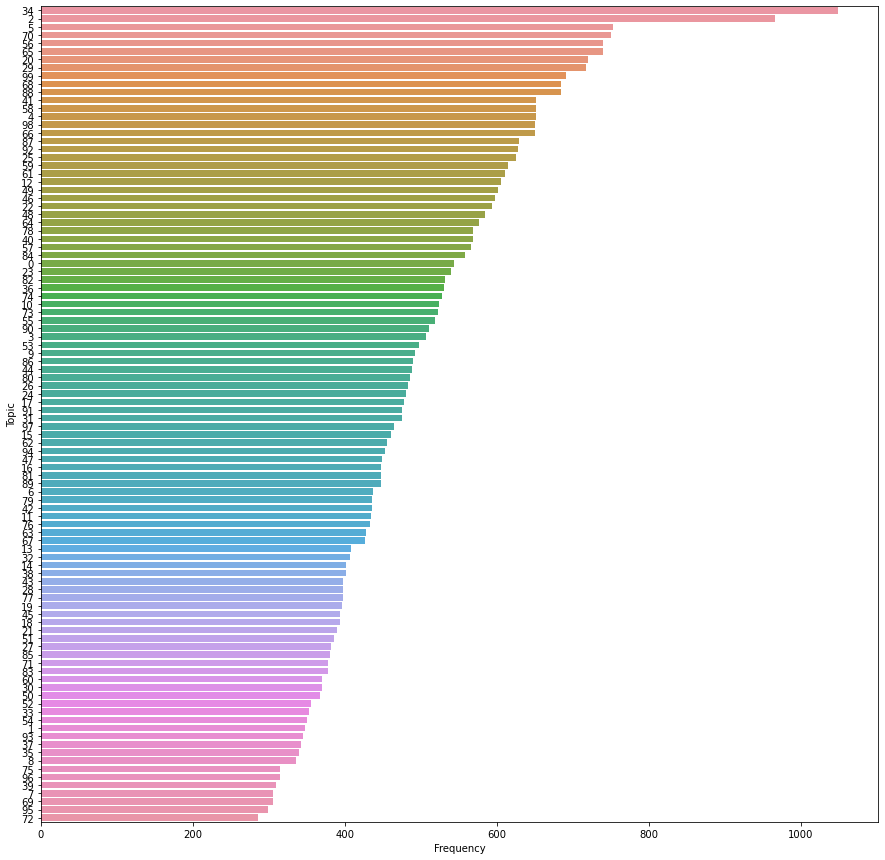

In [84]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
x = data_headlines['Topic'].value_counts()
fig = sns.barplot(x.values,x.index.astype(str),orient = 'h')
fig.set(xlabel='Frequency', ylabel='Topic')
plt.show()

In [127]:
indices_of_top_topic_indices = data_headlines['Topic'].value_counts()[:15].index.tolist()

In [128]:
for index,topic in enumerate(lda_model.components_):
    if index in indices_of_top_topic_indices:
      print(f'THE TOP 8 WORDS FOR TOPIC #{index}')
      print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
      print('\n')

THE TOP 8 WORDS FOR TOPIC #2
['secret', 'document', 'reveal', 'ecuador', 'cable', 'founder', 'cia', 'julian', 'assange', 'wikileaks']


THE TOP 8 WORDS FOR TOPIC #4
['israeli', 'virus', 'flotilla', 'gaza', 'israel', 'confirms', 'condemns', 'lebanon', 'asks', 'hostage']


THE TOP 8 WORDS FOR TOPIC #5
['surprise', 'nuclear', 'airline', 'il', 'jong', 'kim', 'south', 'korean', 'north', 'korea']


THE TOP 8 WORDS FOR TOPIC #20
['party', 'picture', 'riot', 'year', 'bay', 'house', 'sentenced', 'white', 'pirate', 'prison']


THE TOP 8 WORDS FOR TOPIC #29
['corrupt', 'scotland', 'independence', 'crimea', 'russia', 'russian', 'violent', 'fighter', 'jet', 'georgia']


THE TOP 8 WORDS FOR TOPIC #34
['copyright', 'access', 'web', 'data', 'google', 'facebook', 'block', 'twitter', 'user', 'internet']


THE TOP 8 WORDS FOR TOPIC #41
['angela', 'chancellor', 'budget', '35', 'wealth', 'cancel', 'export', 'german', 'pacific', 'merkel']


THE TOP 8 WORDS FOR TOPIC #56
['indonesia', 'japan', 'hit', 'alert'

## Predictive Modeling based on LDA output

In [85]:
h = data_headlines["Headlines"].tolist()
t = data_headlines["Topic"].tolist()
converter = dict(zip(h,t))

In [86]:
topic_df = data_processed.copy(deep = True)

In [88]:
topic_df.drop(columns = "Label", inplace = True)

In [89]:
for i in range(topic_df.shape[0]):
    for j in range(topic_df.shape[1]):
        topic_df.iloc[i,j] = converter.get(topic_df.iloc[i,j])

In [90]:
topic_df = topic_df.astype(str)

In [91]:
topic_df.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,29,97,73,73,61,29,1,20,22,29,...,55,98,22,36,29,58,29,79,75,54
1,7,22,22,66,24,19,29,22,77,95,...,22,9,39,20,73,79,0,29,67,74
2,24,29,66,53,29,94,88,29,47,27,...,29,29,58,29,0,29,73,73,86,89
3,88,47,76,97,90,29,62,77,85,29,...,22,29,35,58,14,41,70,99,67,58
4,7,81,97,22,63,82,69,82,46,97,...,45,22,48,29,9,12,27,44,80,40


In [93]:
all_cols = topic_df.columns.tolist()

In [95]:
category_values = {}
for each in all_cols:
    cat = [str(x) for x in range(100)]
    category_values[each] = cat

In [97]:
def preprocess_df(df):
    new_df = df.copy(deep=True)
    for feature in df.columns:
        for value in category_values[feature]:
            new_df[feature + "_" + value] = df[feature].apply(lambda x: 1 if x == value else 0)
        new_df = new_df.drop(feature, axis=1) # drop the original column
    return new_df

In [98]:
processed_topic_df = preprocess_df(topic_df)

In [99]:
processed_topic_df.head()

,Top1_0,Top1_1,Top1_2,Top1_3,Top1_4,Top1_5,Top1_6,Top1_7,Top1_8,Top1_9,...,Top25_90,Top25_91,Top25_92,Top25_93,Top25_94,Top25_95,Top25_96,Top25_97,Top25_98,Top25_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
processed_topic_df.shape

(1989, 2500)

In [101]:
processed_topic_df["Label"] = data_processed["Label"]

In [102]:
processed_topic_df.shape

(1989, 2501)

In [104]:
allfeas = processed_topic_df.columns.tolist()
allfeas.remove("Label")

x_train2, x_test2, y_train2, y_test2 = train_test_split(processed_topic_df[allfeas], processed_topic_df["Label"],  test_size=0.2, random_state=32)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2,  test_size=0.2, random_state=32)

In [105]:
x_train2.shape

(1272, 2500)

In [108]:
def tune_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_layers", min_value=2, max_value=4, step=1)):
        model.add(layers.Dense(units=hp.Int("units_" + str(i), min_value=2500, max_value=5000, step=2500), 
                               activation="relu"))
    
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy",
                metrics=["accuracy", "TruePositives", "TrueNegatives",
                         "FalsePositives", "FalseNegatives"])
    return model

tuner_acc = RandomSearch(
    tune_model, objective="val_accuracy", 
    max_trials=10, executions_per_trial=3, project_name="nlp_project"
)

tuner_acc.search_space_summary()

tuner_acc.search(x_train2.values,
                 y_train2.values,
                 epochs=40,
                 batch_size=500,
                 validation_data=(x_val2.values, y_val2.values),
                 callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)])

tuner_acc.results_summary()

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.5475443998972574

Best val_accuracy So Far: 0.5527690649032593
Total elapsed time: 00h 02m 59s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in ./nlp_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 5000
units_1: 2500
units_2: 2500
units_3: 2500
Score: 0.5527690649032593
Trial summary
Hyperparameters:
num_layers: 2
units_0: 5000
units_1: 2500
units_2: 5000
units_3: 2500
Score: 0.5506792068481445
Trial summary
Hyperparameters:
num_layers: 2
units_0: 2500
units_1: 2500
units_2: 5000
units_3: 5000
Score: 0.5496342778205872
Trial summary
Hyperparameters:
num_layers: 3
units_0: 5000
units_1: 2500
units_2: 2500
units_3: 5000
Score: 0.5475443998972574
Trial summary
Hyperparameters:
num_layers: 2
units_0: 5000
units_1: 5000
units_2: 2500
Score: 0.543364683787028
Trial summary
Hyperparameters:
num_layers: 4
units_0: 5000
units_1: 2500
units_2: 2500


num_layers: 3
units_0: 5000
units_1: 2500
units_2: 2500

In [109]:
def best_model(layer_info):
    model = keras.Sequential()
    for i in range(len(layer_info)):
        model.add(layers.Dense(layer_info[i], activation="relu"))
    
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy",
                metrics=["accuracy", 
                         "TruePositives", "TrueNegatives",
                         "FalsePositives", "FalseNegatives"])
    return model

In [115]:
model = best_model([5000, 2500, 2500])
model.fit(x_train2.values, y_train2.values, epochs=40, batch_size=500,
                   validation_data=(x_val2.values, y_val2.values),
                   callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)])

Epoch 1/40
3/3 [==============================] - 2s 429ms/step - loss: 0.9052 - accuracy: 0.5275 - true_positives: 364.0000 - true_negatives: 169.5000 - false_positives: 301.0000 - false_negatives: 176.5000 - val_loss: 0.6899 - val_accuracy: 0.5329 - val_true_positives: 170.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 149.0000 - val_false_negatives: 0.0000e+00
Epoch 2/40
3/3 [==============================] - 1s 248ms/step - loss: 0.6693 - accuracy: 0.6896 - true_positives: 484.0000 - true_negatives: 237.7500 - false_positives: 233.5000 - false_negatives: 55.7500 - val_loss: 0.6899 - val_accuracy: 0.5423 - val_true_positives: 170.0000 - val_true_negatives: 3.0000 - val_false_positives: 146.0000 - val_false_negatives: 0.0000e+00
Epoch 3/40
3/3 [==============================] - 1s 244ms/step - loss: 0.6384 - accuracy: 0.8841 - true_positives: 503.7500 - true_negatives: 392.0000 - false_positives: 78.5000 - false_negatives: 36.7500 - val_loss: 0.6890 - val_accuracy: 0.56

In [116]:
print("Overall accuracy:")
model.evaluate(x_test2.values, y_test2.values)

Overall accuracy:
13/13 [==============================] - 0s 11ms/step - loss: 1.0121 - accuracy: 0.5477 - true_positives: 211.0000 - true_negatives: 7.0000 - false_positives: 173.0000 - false_negatives: 7.0000


[1.012126088142395, 0.5477386713027954, 211.0, 7.0, 173.0, 7.0]

In [117]:
topic_df_dup = topic_df.copy(deep = True)
topic_df_dup["Label"] = data_processed["Label"]

In [118]:
from scipy.stats import chi2_contingency
SIG = 0.05
MOD_SIG = 0.1
for col in all_cols:
    contingency = pd.crosstab(topic_df_dup["Label"], topic_df_dup[col])
    c, p, dof, expected = chi2_contingency(contingency)
    if p < SIG:
        print(col, "and label are not independent - keep, p =", p)
    elif p < MOD_SIG:
        print(col, "and label may have some relationship - maybe keep, p =", p)
    else:
        print(col, "and label are independent - drop, p =", p)

Top1 and label are independent - drop, p = 0.8608105264601221
Top2 and label are independent - drop, p = 0.663304714614394
Top3 and label are independent - drop, p = 0.742957269973023
Top4 and label are independent - drop, p = 0.3965128234382518
Top5 and label are independent - drop, p = 0.5425433381951693
Top6 and label are independent - drop, p = 0.583370324322089
Top7 and label are independent - drop, p = 0.814444153679705
Top8 and label are independent - drop, p = 0.444745506325847
Top9 and label are independent - drop, p = 0.18635360371540055
Top10 and label are independent - drop, p = 0.7176505527588355
Top11 and label are independent - drop, p = 0.6366970536389743
Top12 and label are independent - drop, p = 0.11285002872583934
Top13 and label are independent - drop, p = 0.8515433383946387
Top14 and label are independent - drop, p = 0.7336514625016264
Top15 and label are independent - drop, p = 0.8300364701069047
Top16 and label are independent - drop, p = 0.5589626617719347
Top1

In [119]:
KEEP_FEA = ["Top25"]
chosen_df = topic_df_dup[KEEP_FEA]

In [120]:
processed_chosen_df = preprocess_df(chosen_df)
processed_chosen_df["Label"] = data_processed["Label"]
chosen_allfeas = processed_chosen_df.columns.tolist()
chosen_allfeas.remove("Label")
chosen_x_train2, chosen_x_test2, chosen_y_train2, chosen_y_test2 = train_test_split(processed_chosen_df[chosen_allfeas], processed_chosen_df["Label"],  test_size=0.2, random_state=32)
chosen_x_train2, chosen_x_val2, chosen_y_train2, chosen_y_val2 = train_test_split(chosen_x_train2, chosen_y_train2,  test_size=0.2, random_state=32)

In [121]:
chosen_x_train2.shape

(1272, 100)

In [122]:
def tune_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("num_layers", min_value=2, max_value=4, step=1)):
        model.add(layers.Dense(units=hp.Int("units_" + str(i), min_value=100, max_value=300, step=50), activation="relu"))
    
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy",
                metrics=["accuracy", "TruePositives", "TrueNegatives",
                         "FalsePositives", "FalseNegatives"])
    return model

chosen_tuner_acc = RandomSearch(
    tune_model, objective="val_accuracy", 
    max_trials=10, executions_per_trial=3, project_name="nlp_project4"
)

chosen_tuner_acc.search_space_summary()

chosen_tuner_acc.search(chosen_x_train2.values,
                 chosen_y_train2.values,
                 epochs=40,
                 batch_size=100,
                 validation_data=(chosen_x_val2.values, chosen_y_val2.values),
                 callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)])

chosen_tuner_acc.results_summary()

Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.5193312565485636

Best val_accuracy So Far: 0.5454545418421427
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in ./nlp_project4
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 150
units_1: 250
units_2: 300
units_3: 150
Score: 0.5454545418421427
Trial summary
Hyperparameters:
num_layers: 2
units_0: 150
units_1: 250
Score: 0.5360501607259115
Trial summary
Hyperparameters:
num_layers: 4
units_0: 200
units_1: 100
units_2: 100
units_3: 100
Score: 0.5350052316983541
Trial summary
Hyperparameters:
num_layers: 3
units_0: 150
units_1: 300
units_2: 250
Score: 0.5339602828025818
Trial summary
Hyperparameters:
num_layers: 3
units_0: 250
units_1: 250
units_2: 100
Score: 0.531870424747467
Trial summary
Hyperparameters:
num_layers: 3
units_0: 200
units_1: 250
units_2: 250
Score: 0.5308254957199097
Trial summary
Hyperparameters:
num

num_layers: 2
units_0: 150
units_1: 250

In [123]:
chosen_best_model = best_model([150,250])

In [125]:
chosen_best_model.fit(chosen_x_train2.values, chosen_y_train2.values, epochs=40, batch_size=100,
                   validation_data=(chosen_x_val2.values, chosen_y_val2.values),
                   callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)])

Epoch 1/40
13/13 [==============================] - 0s 6ms/step - loss: 0.6639 - accuracy: 0.6211 - true_positives: 516.0000 - true_negatives: 274.0000 - false_positives: 321.0000 - false_negatives: 161.0000 - val_loss: 0.7103 - val_accuracy: 0.4922 - val_true_positives: 111.0000 - val_true_negatives: 46.0000 - val_false_positives: 103.0000 - val_false_negatives: 59.0000
Epoch 2/40
13/13 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.6281 - true_positives: 488.0000 - true_negatives: 311.0000 - false_positives: 284.0000 - false_negatives: 189.0000 - val_loss: 0.7198 - val_accuracy: 0.4828 - val_true_positives: 107.0000 - val_true_negatives: 47.0000 - val_false_positives: 102.0000 - val_false_negatives: 63.0000
Epoch 3/40
13/13 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6250 - true_positives: 467.0000 - true_negatives: 328.0000 - false_positives: 267.0000 - false_negatives: 210.0000 - val_loss: 0.7290 - val_accuracy: 0.4796 - 

In [126]:
chosen_best_model.evaluate(chosen_x_test2, chosen_y_test2)

13/13 [==============================] - 0s 676us/step - loss: 0.7136 - accuracy: 0.5402 - true_positives: 119.0000 - true_negatives: 96.0000 - false_positives: 84.0000 - false_negatives: 99.0000


[0.7135671377182007, 0.5402010083198547, 119.0, 96.0, 84.0, 99.0]